# Linear Regression Project




In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
#!pip install statsmodels
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Load Dataset

In [91]:
#Load data set

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

## Step 2: Basic EDA

In [92]:
#Take a sample

df.sample(10)

,age,sex,bmi,children,smoker,region,charges
74,44,male,27.400,2,no,southwest,7726.85400
198,51,female,18.050,0,no,northwest,9644.25250
1224,41,male,23.940,1,no,northeast,6858.47960
1232,54,female,24.605,3,no,northwest,12479.70895
1258,55,male,37.715,3,no,northwest,30063.58055
991,38,female,27.835,2,no,northeast,7144.86265
246,60,female,38.060,0,no,southeast,12648.70340
426,38,female,27.265,1,no,northeast,6555.07035
1061,57,male,27.940,1,no,southeast,11554.22360
75,57,male,34.010,0,no,northwest,11356.66090


In [93]:
#Get basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There is no null values

In [94]:
#Describe numerical features

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
#Describe categorical data

df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [96]:
df.duplicated().any()

True

In [97]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In this case we could keep the duplicates, since they could be different people

#### Correlation

In [98]:
#Correlation with target variable

df.corr()['charges'].sort_values()


children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

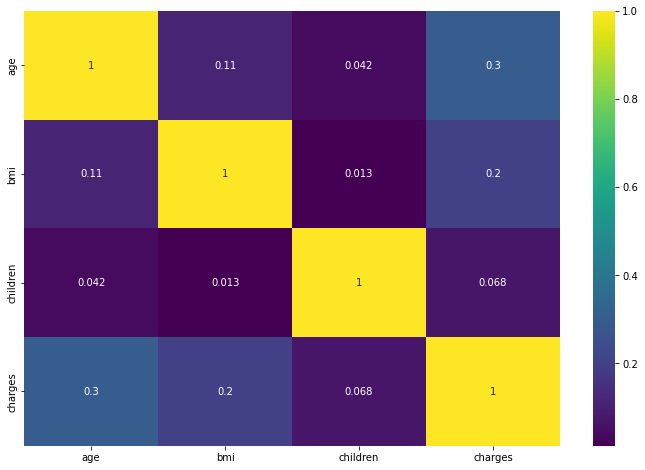

In [99]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

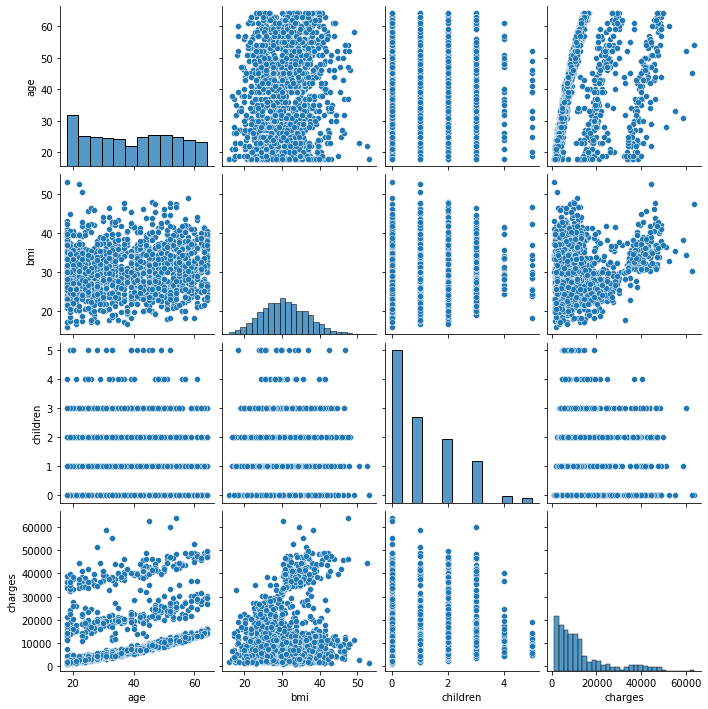

In [100]:
sns.pairplot(data=df)

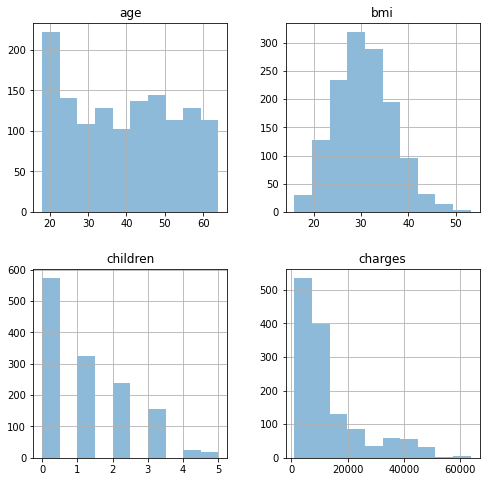

In [101]:
#Distribution of numerical data

df.hist(figsize=(8,8), alpha=0.5)
plt.show()

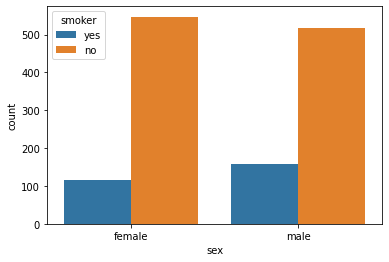

In [102]:
sns.countplot(data=df, x='sex', hue='smoker')
plt.show()

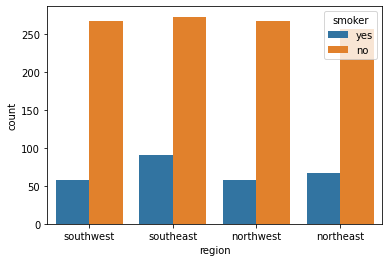

In [103]:
sns.countplot(data=df, x='region', hue='smoker')
plt.show()

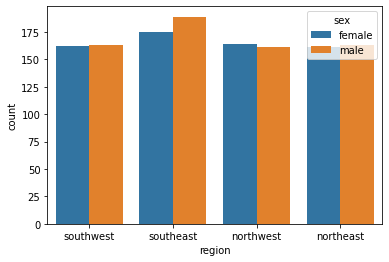

In [104]:
sns.countplot(data=df, x='region', hue='sex')
plt.show()

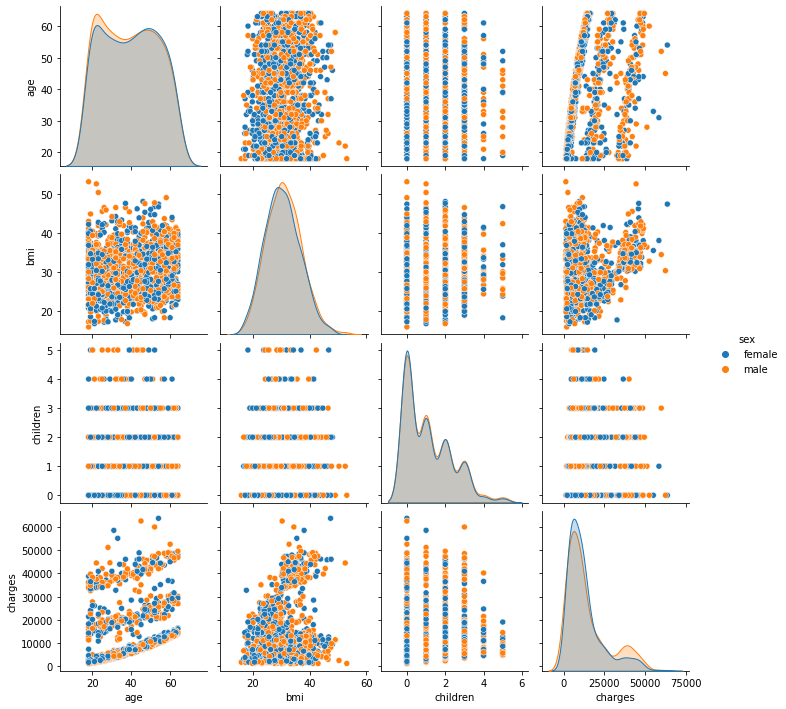

In [105]:
sns.pairplot(data=df, hue='sex')
plt.show()

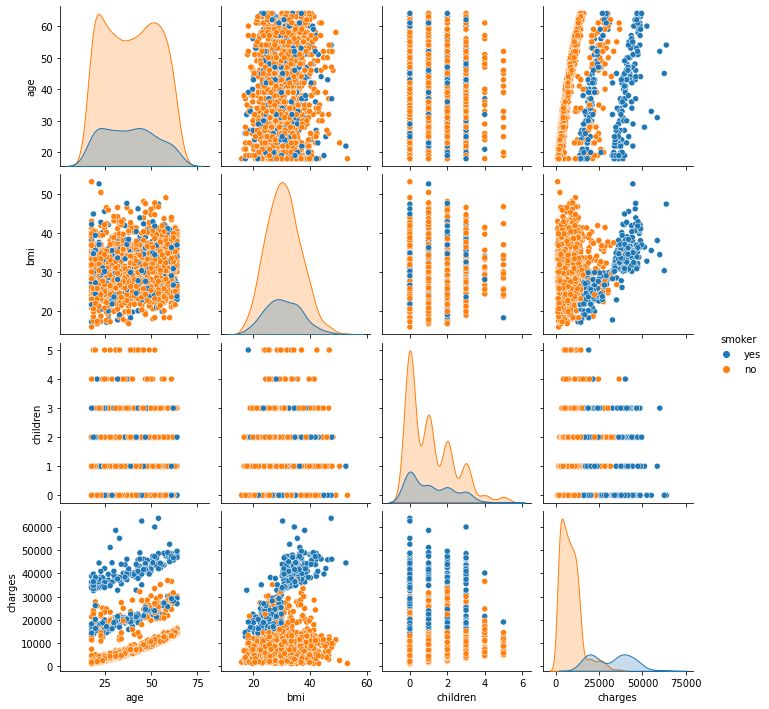

In [106]:
sns.pairplot(data=df, hue='smoker')
plt.show()

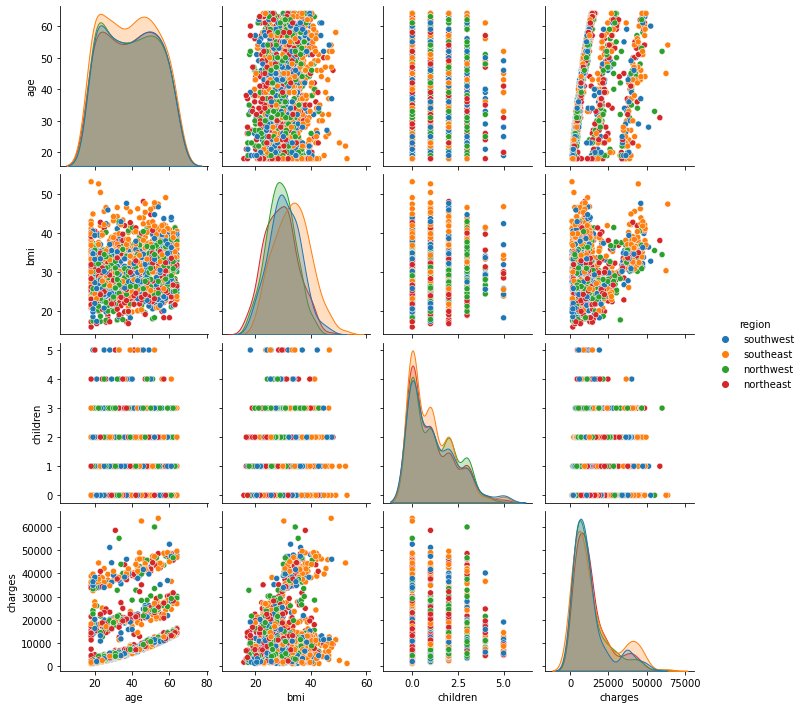

In [107]:
sns.pairplot(data=df, hue='region')
plt.show()

#### Transform categorical features

In [108]:
#Pasar variables categoricas 

df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)

In [109]:
df.sample(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
849,55,32.775,0,10601.63225,1,0,1,0,0
1112,48,25.850,3,24180.93350,0,1,0,1,0
546,28,35.435,0,3268.84665,1,0,0,0,0
793,53,20.900,0,21195.81800,1,1,0,1,0
445,45,33.100,0,7345.08400,0,0,0,0,1
954,34,27.835,1,20009.63365,1,1,1,0,0
129,38,34.700,2,6082.40500,1,0,0,0,1
835,42,35.970,2,7160.33030,1,0,0,1,0
847,23,50.380,1,2438.05520,1,0,0,1,0
393,49,31.350,1,9290.13950,1,0,0,0,0


### Step 3: first linear regression model 


In [110]:
x = df.drop("charges", axis=1)
y = df.charges

In [111]:
# Split train and test data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 15)

In [122]:
model = LinearRegression() 

#Train

model.fit(x_train, y_train)

print( "Intercept: ", model.intercept_ )
print("Variables: ", x_train.columns)
print( "Coef: ", model.coef_ ) 


Intercept:  -11812.952212787559
Variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Coef:  [  259.28377294   334.33013348   560.38480047  -216.92164981
 24043.57115706  -210.36710762 -1159.01410243  -989.16702841]


In [113]:
#Other way

x_interceptor = sm.add_constant(x_train)
model2 = sm.OLS(y_train, x_interceptor)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     351.2
Date:                Fri, 22 Jul 2022   Prob (F-statistic):          1.85e-283
Time:                        17:35:17   Log-Likelihood:                -10183.
No. Observations:                1003   AIC:                         2.038e+04
Df Residuals:                     994   BIC:                         2.043e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.181e+04   1164.810    -10.142      0.000   -1.41e+04   -9527.184
age                259.2838     14.094     18.396      0.000     231.626     286.942
bmi                334.3301     33.696      9.922      0.000     268.206     400.454
children           560.3848    161.831      3.463      0.001     242.816     877.954
sex_male          -216.9216    397.204     -0.546      0.585    -996.376     562.532
smoker_yes        2.404e+04    499.031     48.181      0.000    2.31e+04     2.5e+04
region_northwest  -210.3671    567.856     -0.370      0.711   -1324.700     903.966
region_southeast -1159.0141    572.395     -2.025      0.043   -2282.255     -35.773
region_southwest  -989.1670    558.264     -1.772      0.077   -2084.678     106.343
==============================================================================
Omnibus:                      231.741   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.491
Skew:                           1.239   Prob(JB):                    3.53e-119
Kurtosis:                       5.629   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#Predictions

y_pred = model.predict(x_test)


In [115]:
#Metrics

print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 4023.6471495940405
Mean Squared Error: 30723136.826880053
Root Mean Squared Error: 5542.845553222645
R^2 score: 0.7866857073627448


### Step 4 - Hypertune the model

#### Model without intercept


In [116]:
#Model without intercept

model3 = LinearRegression(fit_intercept=False)

#Train

model3.fit(x_train, y_train)

print( "Intercept: ", model3.intercept_ )
print("Variables: ", x_train.columns)
print( "Coef: ", model3.coef_ ) 


Intercept:  0.0
Variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Coef:  [  204.58595225    69.21025209   371.7742913   -742.35489543
 23579.74455128 -1506.04330995 -1399.77505837 -1925.52747762]


In [117]:
#Predict

y_pred = model3.predict(x_test)

In [118]:
#Metrics

print("Model without intercept")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")

Model without intercept
Mean Absolute Error: 4278.042622074816
Mean Squared Error: 34870064.92980866
Root Mean Squared Error: 5905.088054365376
R^2 score: 0.757893105882032


#### Model with second degree polynomial

In [119]:
#Model with second degree polynomial
 
poly_features = PolynomialFeatures(degree = 2) 

#Transform features

x_poly_train = poly_features.fit_transform(x_train) 
x_poly_test = poly_features.fit_transform(x_test)

modelo4 = model.fit(x_poly_train, y_train)

In [120]:
y_pred_poly = modelo4.predict(x_poly_test)

In [121]:
print()
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_poly)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_poly)}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))}")
print(f"R^2 score: {r2_score(y_test, y_pred_poly)}")


Mean Absolute Error: 3794.6198658238804
Mean Squared Error: 27793221.25291654
Root Mean Squared Error: 5271.927660061027
R^2 score: 0.8070284500868565
